In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load the data and make sure theres no missing lines
trainDF = pd.read_csv("train.csv")

# Remove rows with missing data
trainDF_cleaned = trainDF.dropna()

# Optionally, save the cleaned data to a new CSV file
trainDF_cleaned.to_csv('cleaned_training_data.csv', index=False)

trainDF_cleaned = pd.read_csv("cleaned_training_data.csv")

In [3]:
def trainModel(df, learning_rate, iterations):
    # Scale the data
    df['budget_scaled'] = df['budget'] / 1000000
    df['revenue_scaled'] = df['revenue'] / 1000000

    slope = 0
    intercept = 0

    for i in range(iterations):
        # Predicted revenues
        predicted_revenues = slope * df['budget_scaled'] + intercept

        # Calculate the difference between actual and predicted revenues
        diff = df['revenue_scaled'] - predicted_revenues

        # Gradient descent adjustments
        slope_gradient = -2 * df['budget_scaled'].dot(diff) / len(df)
        intercept_gradient = -2 * diff.mean()

        # Update slope and intercept
        slope -= learning_rate * slope_gradient
        intercept -= learning_rate * intercept_gradient

        # Monitor values
        #if i % 10 == 0:  # Print every 10 iterations
            #print(f"Iteration {i}: Slope: {slope}, Intercept: {intercept}")
        
    print(slope)
    print(intercept)

    return slope, intercept


In [4]:
def testModel(test_df, slope, intercept):
    # Predict revenue
    predicted_revenue = slope * test_df['budget'] + intercept

    # Actual revenue
    actual_revenue = test_df['revenue']

    # Calculate metrics
    mse = ((predicted_revenue - actual_revenue) ** 2).mean()
    rmse = np.sqrt(mse)
    mae = (predicted_revenue - actual_revenue).abs().mean()
    r_squared = 1 - (((actual_revenue - predicted_revenue) ** 2).sum() / ((actual_revenue - actual_revenue.mean()) ** 2).sum())

    return mse, rmse, mae, r_squared * 100


In [5]:
#split teh data because dumb training data lmao

# Load your data
df = pd.read_csv('cleaned_training_data.csv')

# Split the data into training and testing sets (70% train, 30% test)
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)


NameError: name 'train_test_split' is not defined

In [ ]:
trained_slope, trained_intercept = trainModel(train_df, learning_rate=0.000001, iterations=3000)

3.5592111696741173
0.2709356717072835


In [ ]:
# Test the model using the testing set
mse, rmse, mae, r_squared_percentage = testModel(test_df, trained_slope, trained_intercept)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Percentage: {r_squared_percentage}%")


Mean Squared Error: 5.074463670965468e+16
Root Mean Squared Error: 225265702.47078156
Mean Absolute Error: 145382936.68975088
R-squared Percentage: 65.18796878186494%


MemoryError: 

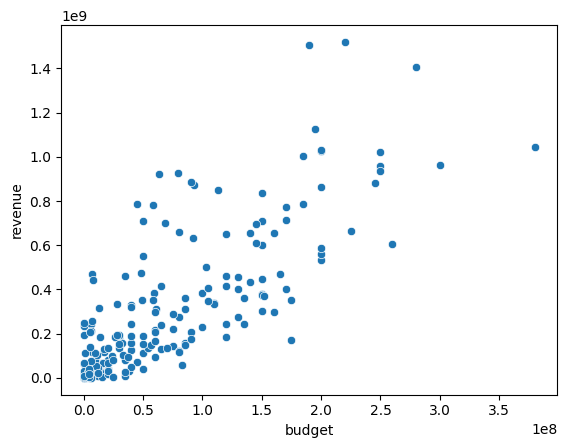

In [ ]:
graph = sns.scatterplot(trainDF_cleaned, x="budget", y="revenue")

# Create a range of x-values
x_values = range(0, 100000)

# Calculate the corresponding y-values for the line
y_values = [3.5592111696741173 * x + 0.2709356717072835 for x in x_values]

# Add the line to the plot
plt.plot(x_values, y_values, color='red')

# Show the plot
plt.show()
